# 1)Data Collection and Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
ch=pd.read_csv('Data.csv')
ch.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Checking for the duplicate values

In [3]:
ch.drop(columns=['customerID'], inplace=True)

In [4]:
ch.duplicated().sum()

22

In [5]:
ch.drop_duplicates(inplace=True)

In [6]:
ch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 


In [7]:
ch.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7021.000000,7021.000000,7021.000000
mean,0.162512,32.469449,64.851894
std,0.368947,24.534965,30.069001
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.750000
50%,0.000000,29.000000,70.400000
75%,0.000000,55.000000,89.900000
max,1.000000,72.000000,118.750000


# converting the dtpyes of the columns from object to category

In [8]:
cat_columns=ch.select_dtypes(include=['object']).columns
cat_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
ch[cat_columns]=ch[cat_columns].astype('category')

In [10]:
ch.describe(include='category')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,3541,3619,4911,6339,3368,3090,3490,3080,3087,3465,2802,2777,3853,4161,2359,11,5164


# Converting the TotalCharges into Numeric 

In [11]:
ch['TotalCharges']=pd.to_numeric(ch['TotalCharges'],errors='coerce')

In [12]:
ch['TotalCharges'].isnull().sum()

11

In [13]:
ch['SeniorCitizen'] = ch['SeniorCitizen'].astype('category', errors='ignore')

In [14]:
ch=ch.dropna()

In [15]:
ch.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# 2)Exploratory Data Analysis (EDA)

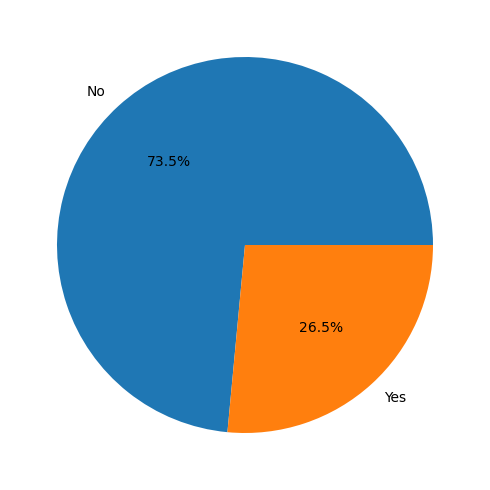

In [16]:
plt.figure(figsize=(5,5))
plt.pie(x=ch['Churn'].value_counts(),autopct='%1.1f%%',labels=ch['Churn'].value_counts().index)
plt.tight_layout()
plt.show()

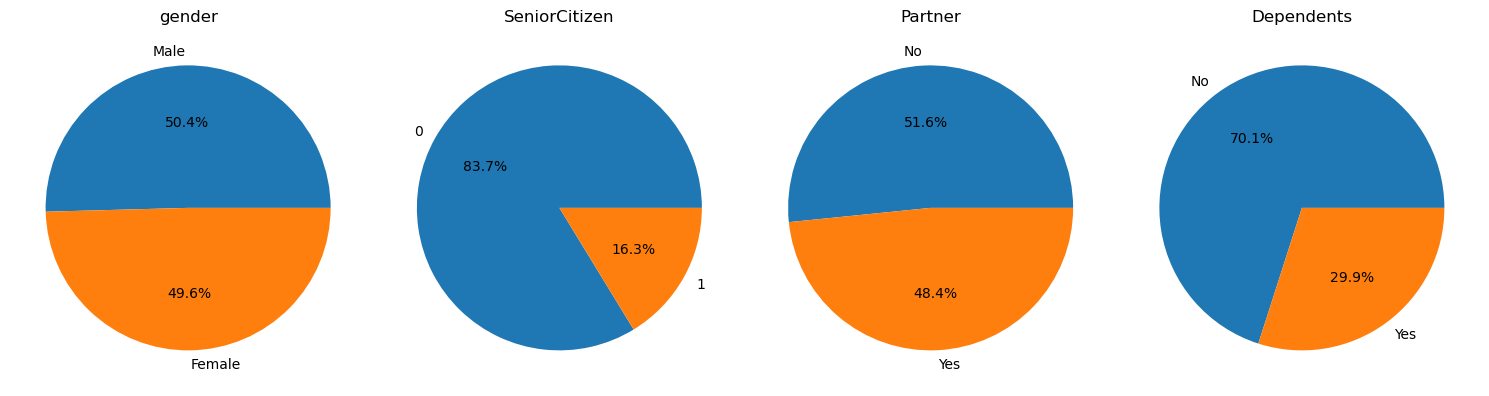

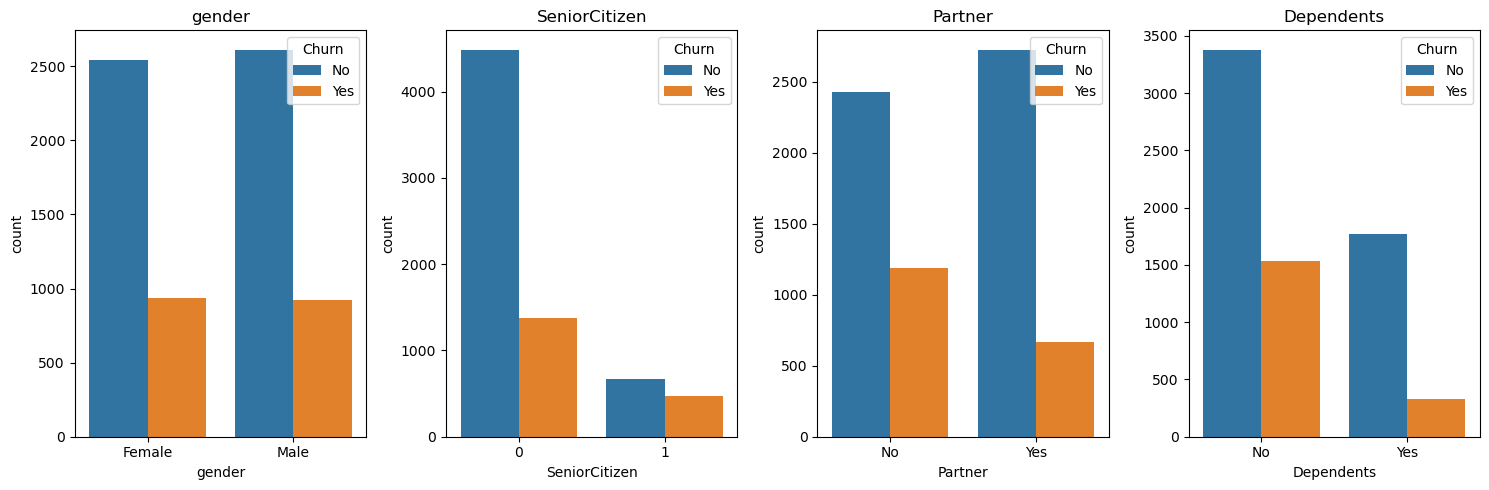

In [17]:
info_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

plt.figure(figsize=(15, 5))

for i, col in enumerate(info_columns, 1):
    plt.subplot(1, 4, i)
    plt.pie(x=ch[col].value_counts(), autopct='%1.1f%%', labels=ch[col].value_counts().index)
    plt.title(col)

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
for i, col in enumerate(info_columns, 1):
    plt.subplot(1, 4, i)
    sns.countplot(x=col, data=ch,hue='Churn')
    plt.title(col)

plt.tight_layout()
plt.show()

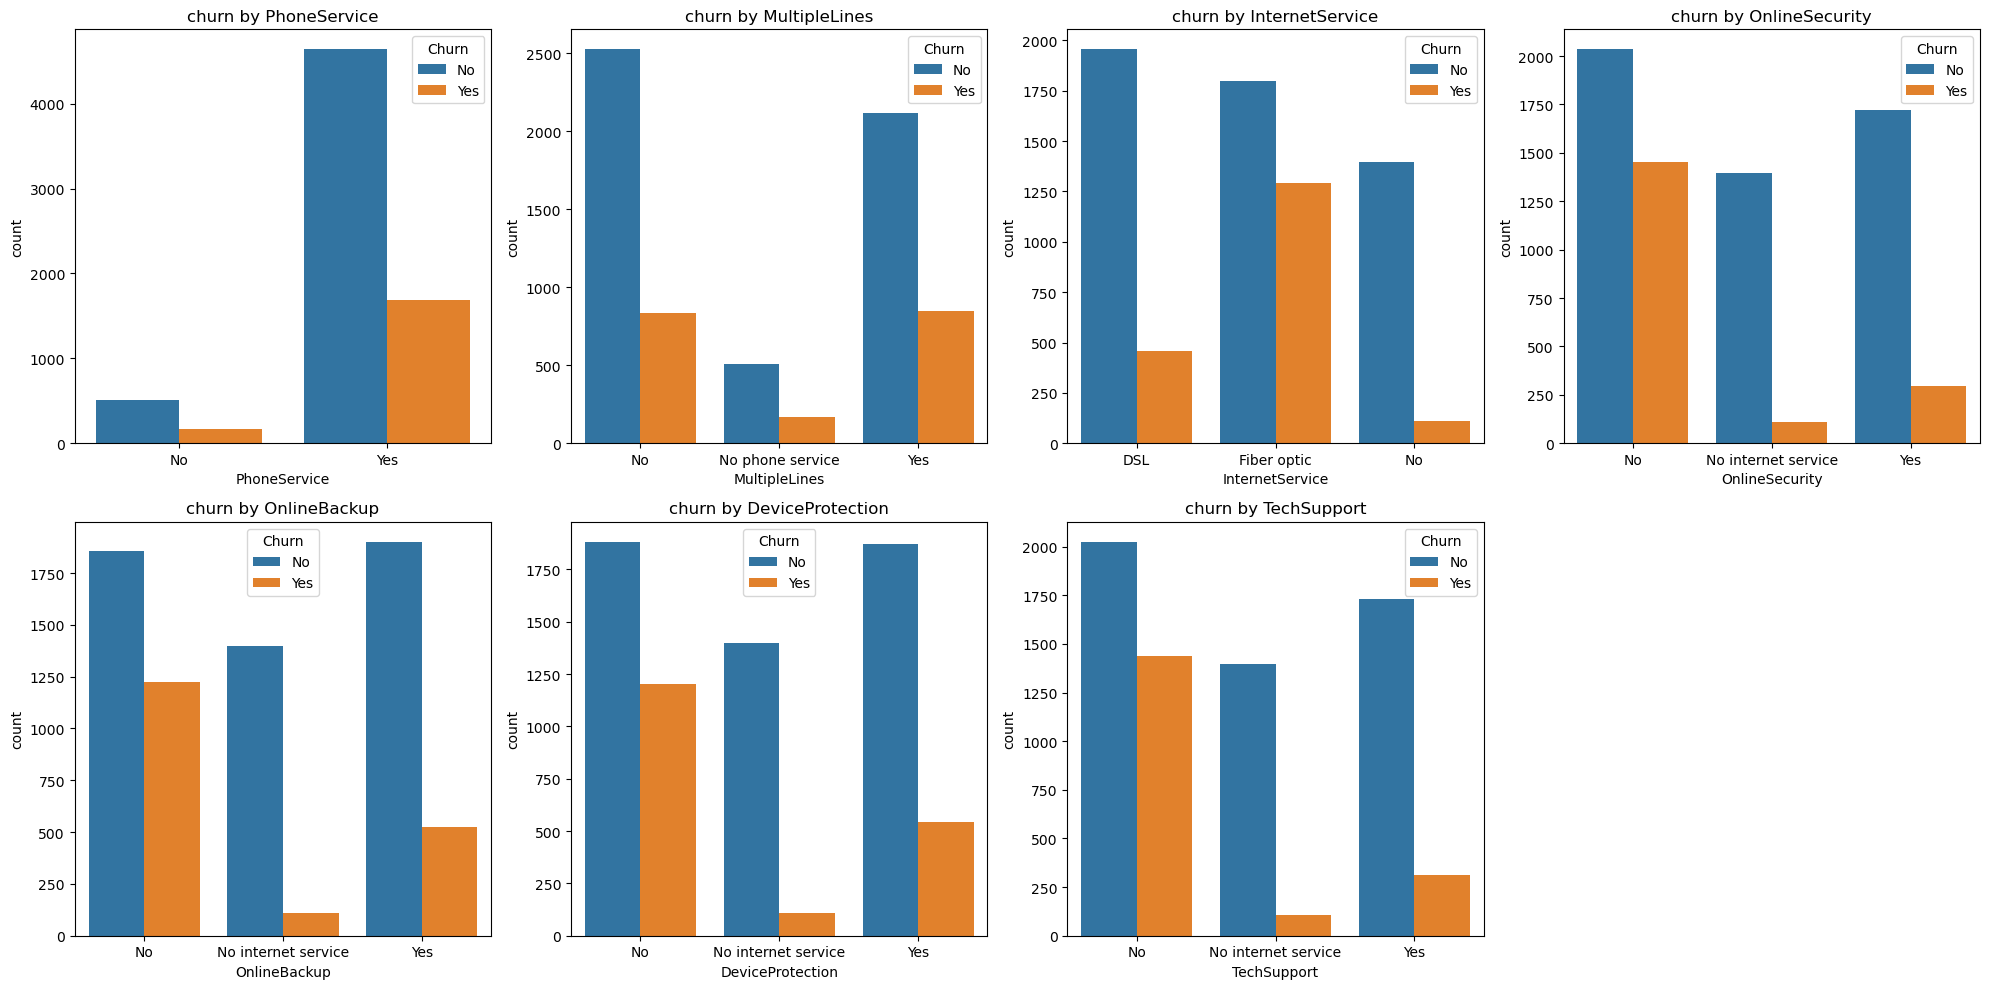

In [18]:
services_columns=['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport']
plt.figure(figsize=(20,10))
for i,col in enumerate(services_columns,1):
    plt.subplot(2,4,i)
    sns.countplot(x=col,data=ch,hue='Churn')
    plt.title(f'churn by {col}' )
plt.tight_layout()
plt.show()
    

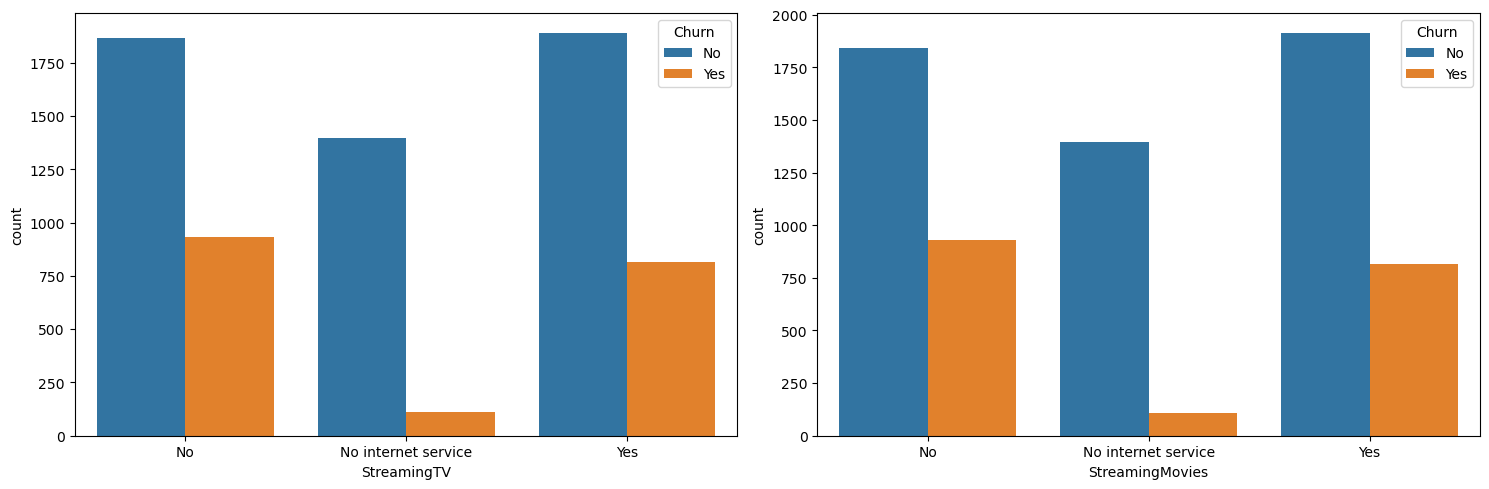

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x='StreamingTV',data=ch,hue='Churn')
plt.subplot(1,2,2)
sns.countplot(x='StreamingMovies',data=ch,hue='Churn')
plt.tight_layout()
plt.show()


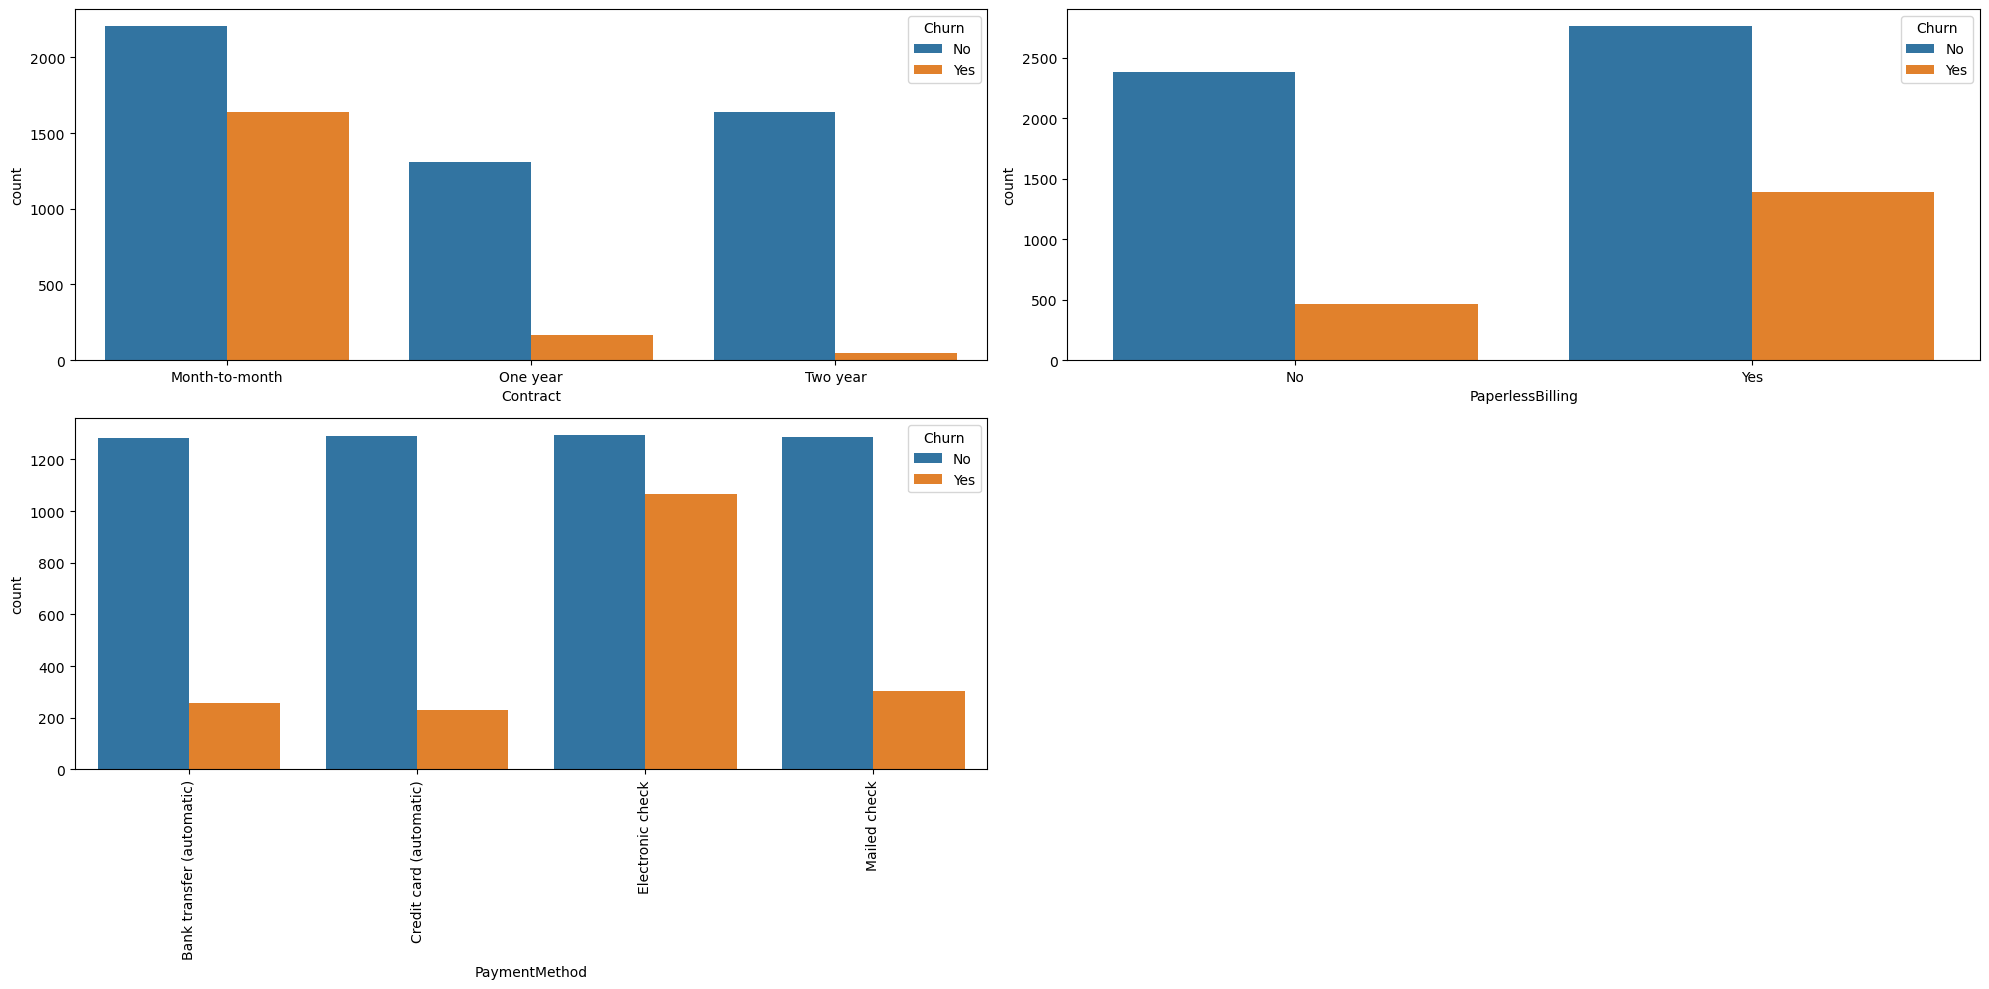

In [20]:
col=['Contract','PaperlessBilling','PaymentMethod']
plt.figure(figsize=(20,10))
for i,col in enumerate(col,1):
    plt.subplot(2,2,i)
    sns.countplot(x=col,data=ch,hue='Churn')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()    

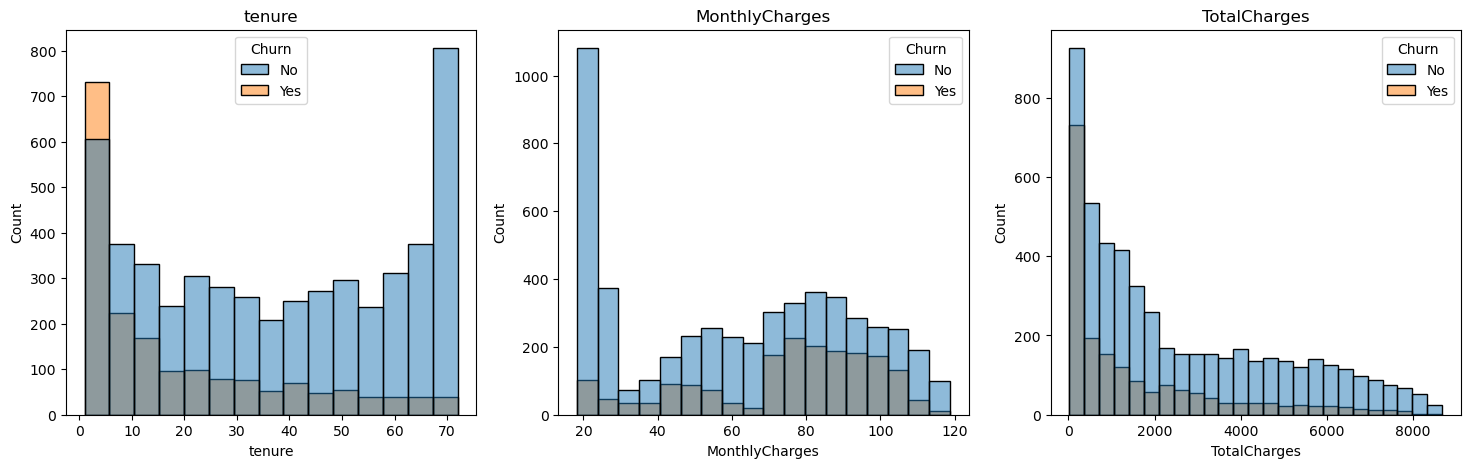

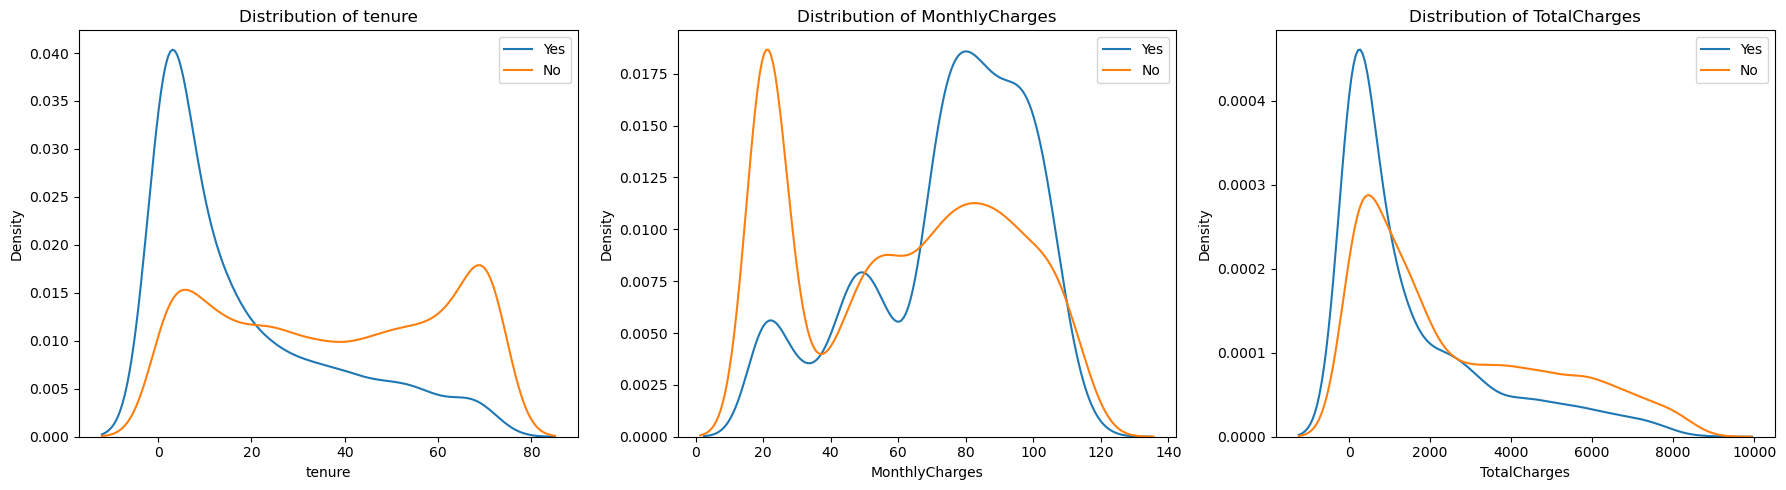

In [21]:
numeric_col=['tenure','MonthlyCharges','TotalCharges']
plt.figure(figsize=(18,5))
for i,col in enumerate(numeric_col,1):
    plt.subplot(1,3,i)
    sns.histplot(x=col,data=ch,hue='Churn')
    plt.title(col)
plt.figure(figsize=(18,5))   
for i,col in enumerate(numeric_col,1):
    plt.subplot(1,3,i)
    sns.kdeplot(ch.loc[ch['Churn']=='Yes',col],label='Yes')
    sns.kdeplot(ch.loc[ch['Churn']=='No',col],label='No')
    plt.xlabel(col)
    plt.title(f'Distribution of {col}')
    plt.legend()
plt.tight_layout()    
plt.show()    

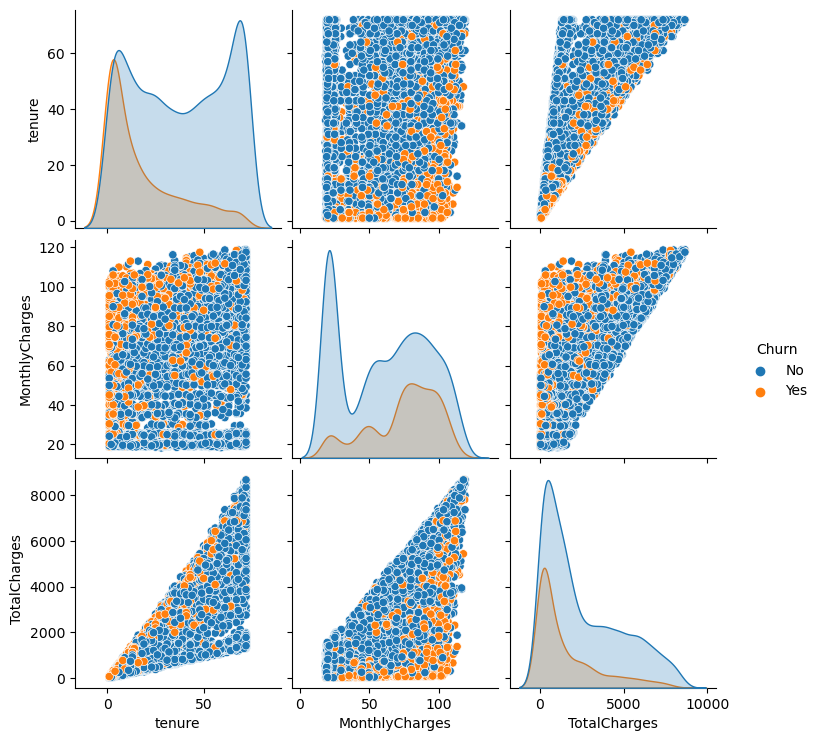

In [22]:
sns.pairplot(ch,hue='Churn')
plt.show()

# 3) Preprocessing & Feature Engineering 

In [23]:
le = LabelEncoder()
binary_cols = [col for col in ch.columns if ch[col].dtype not in [int, float]
               and ch[col].nunique() == 2]

In [24]:
for col in binary_cols:
    labelencoder = LabelEncoder()
    ch[col] = labelencoder.fit_transform(ch[col])
ch    

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,0,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,0,0,1,1,11,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


In [25]:
ch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7010 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7010 non-null   int32   
 1   SeniorCitizen     7010 non-null   int64   
 2   Partner           7010 non-null   int32   
 3   Dependents        7010 non-null   int32   
 4   tenure            7010 non-null   int64   
 5   PhoneService      7010 non-null   int32   
 6   MultipleLines     7010 non-null   category
 7   InternetService   7010 non-null   category
 8   OnlineSecurity    7010 non-null   category
 9   OnlineBackup      7010 non-null   category
 10  DeviceProtection  7010 non-null   category
 11  TechSupport       7010 non-null   category
 12  StreamingTV       7010 non-null   category
 13  StreamingMovies   7010 non-null   category
 14  Contract          7010 non-null   category
 15  PaperlessBilling  7010 non-null   int32   
 16  PaymentMethod     7010 n

In [26]:
cols = [col for col in ch.columns if 30 >= ch[col].nunique() > 2]
drop_first=True
ch=pd.get_dummies(ch,columns=cols,drop_first=drop_first)

In [27]:
scaler = StandardScaler()
ch[numeric_col] = scaler.fit_transform(ch[numeric_col])
ch[numeric_col].head()

,tenure,MonthlyCharges,TotalCharges
0,-1.285566,-1.165523,-0.997284
1,0.060346,-0.264071,-0.176848
2,-1.244781,-0.367189,-0.962740
3,0.508983,-0.751387,-0.198355
4,-1.244781,0.193308,-0.943549


# 4) Building the Churn Prediction Model

In [28]:
Algorithms=[]
model_names=[]
y=ch['Churn']
X = ch.drop(["Churn"], axis=1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

In [29]:
# Train the DecisionTreeClassifier model
model = DecisionTreeClassifier().fit(X_train, y_train)
    
# Store the model's name
model_name = DecisionTreeClassifier.__name__
model_names.append(model_name)
    
# Make predictions
y_pred = model.predict(X_test)
    
# Calculate the accuracy score
Report= classification_report(y_test, y_pred)
accuracy=accuracy_score(y_test,y_pred)

Algorithms.append(accuracy)
print(Report )   

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1565
           1       0.47      0.48      0.47       538

    accuracy                           0.73      2103
   macro avg       0.64      0.65      0.64      2103
weighted avg       0.73      0.73      0.73      2103



In [30]:
# Train the GradientBoostingClassifier model
model = GradientBoostingClassifier().fit(X_train, y_train)
    
# Store the model's name
model_name = GradientBoostingClassifier.__name__
model_names.append(model_name)
    
# Make predictions
y_pred = model.predict(X_test)
    
# Calculate the accuracy score
Report= classification_report(y_test, y_pred)
accuracy=accuracy_score(y_test,y_pred)
Algorithms.append(accuracy)
print(Report )   

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1565
           1       0.63      0.54      0.58       538

    accuracy                           0.80      2103
   macro avg       0.74      0.72      0.73      2103
weighted avg       0.79      0.80      0.80      2103



In [31]:
# Train the LogisticRegression model
model = LogisticRegression().fit(X_train, y_train)
    
# Store the model's name
model_name = LogisticRegression.__name__
model_names.append(model_name)
    
# Make predictions
y_pred = model.predict(X_test)
    
# Calculate the accuracy score
Report= classification_report(y_test, y_pred)
accuracy=accuracy_score(y_test,y_pred)
Algorithms.append(accuracy)
print(Report )   

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1565
           1       0.62      0.55      0.58       538

    accuracy                           0.80      2103
   macro avg       0.74      0.72      0.73      2103
weighted avg       0.79      0.80      0.80      2103



In [32]:
classification=pd.DataFrame( Algorithms,columns=['accuracy_score'],index=[model_names]).sort_values(by='accuracy_score',ascending=False)
classification

,accuracy_score
GradientBoostingClassifier,0.802663
LogisticRegression,0.800285
DecisionTreeClassifier,0.726106
